## Exercise 2

In the `FiniteDifferences` notebook we considered the differential equation controlling heat flow which relates the rate of change in $T$, the temperature, to spatial gradients in the same quantity. 

$$
\frac{\partial T}{\partial t} = \kappa \frac{\partial^2 T}{\partial x^2} + H
$$
       
       
We ignored $H$ and solved a number of examples. 

At the end of the notebook we looked at the time-varying solution of the heat equation using an explicit finite difference approximation. Given all the trouble we went to setting this up, don't you think it would be a good idea to see if we can iterate until we reach the steady-state solution?

This is not very complicated to do so I would like you to try it __for the case where $\kappa$ is constant__.

You can copy and paste the cells from the `FiniteDifferences` here to get started.

## Hints

You have most of the code you need. The `np.gradient` function will still be useful ... in fact you really only have to put everything in a `for` loop and enforce the boundary conditions.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
#setting up the initial conditions
np.gradient
nx = 30
ny = 30
dx = 1.0
dy = 1.0
T = np.zeros((ny,nx))
# Initial conditions
T[0,:] = 800.
T[-1,:] = 500.

k = 1

steps = 100
#setting up the arrays to keep track of each itteration
time = np.zeros(steps)
time[0] = 0.0
arrayT = np.array((1,steps))
arrayT[0] = 0.0
#steady state array to store each T itteration
SS = [T]
#timestep loop
for i in range(1, steps):
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = (dx*dy)/k
    time += dt

    T = T + dt*divT
    time[i] = time[i-1] + 1
    #store each itteration of T
    SS.append(T)
   
    
#trying to store T in an array after each loop so that i could compare the current and previous itterations.
#If there was no change between itterations then a steady state would be reached. I was not sure how to procede with this, although
# i ended up looping the process only based on timesteps. I could store T, but i was unable to recall any values stored.

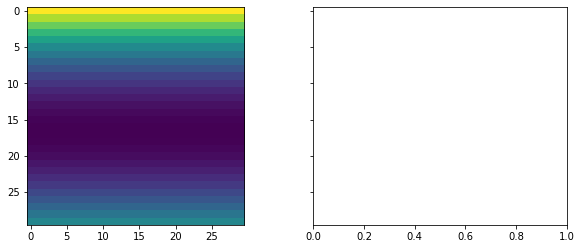

In [124]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.imshow(T)


In [115]:
T

array([[9015.58287876, 9015.58287876, 9015.58287876, 9015.58287876,
        9015.58287876, 9015.58287876, 9015.58287876, 9015.58287876,
        9015.58287876, 9015.58287876, 9015.58287876, 9015.58287876,
        9015.58287876, 9015.58287876, 9015.58287876, 9015.58287876,
        9015.58287876, 9015.58287876, 9015.58287876, 9015.58287876,
        9015.58287876, 9015.58287876, 9015.58287876, 9015.58287876,
        9015.58287876, 9015.58287876, 9015.58287876, 9015.58287876,
        9015.58287876, 9015.58287876],
       [8255.62006998, 8255.62006998, 8255.62006998, 8255.62006998,
        8255.62006998, 8255.62006998, 8255.62006998, 8255.62006998,
        8255.62006998, 8255.62006998, 8255.62006998, 8255.62006998,
        8255.62006998, 8255.62006998, 8255.62006998, 8255.62006998,
        8255.62006998, 8255.62006998, 8255.62006998, 8255.62006998,
        8255.62006998, 8255.62006998, 8255.62006998, 8255.62006998,
        8255.62006998, 8255.62006998, 8255.62006998, 8255.62006998,
        8

We know that there is an instability in the code which occurs if the timestep is too large. Currently the timestep size is related to the size of the mesh and the diffusivity:

$$
\Delta t = \frac{\Delta x \Delta y}{\kappa}
$$


What happens if you overwrite the timestep size, `dt`? What is the point where the solution begins to breakdown and you see wild oscillations? Is it pretty close to the above relation?

In [135]:
## Your test code here

#setting up the initial conditions
np.gradient
nx = 30
ny = 30
dx = 1.0
dy = 1.0
T = np.zeros((ny,nx))
# Initial conditions
T[0,:] = 800.
T[-1,:] = 500.

k = 1

steps = 100
#setting up the arrays to keep track of each itteration
time = np.zeros(steps)
time[0] = 0.0
arrayT = np.array((1,steps))
arrayT[0] = 0.0
#steady state array to store each T itteration
SS = [T]
#timestep loop
for i in range(1, steps):
    gradTx, gradTy = np.gradient(T, dx, dy)
    flux_x = k*gradTx
    flux_y = k*gradTy

    gradTxx, gradTxy = np.gradient(flux_x, dx, dy)
    gradTyx, gradTyy = np.gradient(flux_y, dx, dy)

    divT = gradTxx + gradTyy
    dt = 3
    time += dt

    T = T + dt*divT
    time[i] = time[i-1] + 1
    #store each itteration of T
    SS.append(T)
   

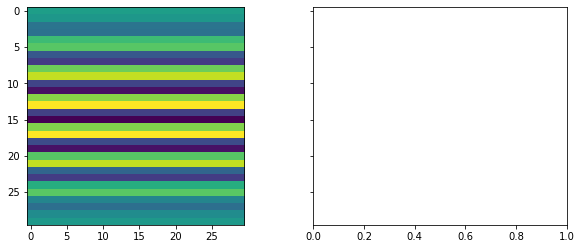

In [136]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10,4))
ax1.imshow(T)

After dt is replaced with numbers exceeding around 2 then the solution becomes unstable and frankly incorrect as seen when dt is replaced by 3 for example.